# **Creación de data tabular de la señales fisiológicas obtenidas en los laboratorios**

In [127]:
#Importación de librerías
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [128]:
#Seleccionamos estilo de ploteo
plt.style.use("ggplot")

## Lectura de los datos

In [129]:
#Lectura de documento txt con tabulación (/t) como delimitador
array1 = np.genfromtxt("ECG_tranquilo.txt", delimiter="\t")
array1

array([[  0.,   0.,   0., ...,   0., 510.,  nan],
       [  1.,   0.,   0., ...,   0., 508.,  nan],
       [  2.,   0.,   0., ...,   0., 498.,  nan],
       ...,
       [  1.,   0.,   0., ...,   0., 532.,  nan],
       [  2.,   0.,   0., ...,   0., 529.,  nan],
       [  3.,   0.,   0., ...,   0., 519.,  nan]])

In [130]:
#Nos quedamos con el dato del sensor
d_sensor = array1[:,-2]
d_sensor

array([510., 508., 498., ..., 532., 529., 519.])

## Graficación de los datos

(0.0, 5000.0)

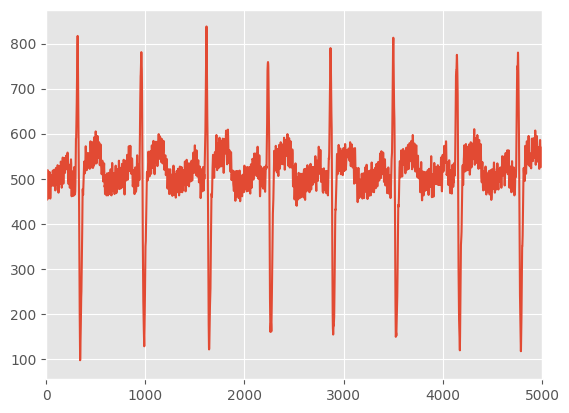

In [131]:
plt.plot(d_sensor)
plt.xlim(0,5000)

## Especificar la Frecuencia de muestreo 

In [132]:
Fs = 1000 #Frecuencia de muestreo del dispositivo de adquisición
Ts=1/Fs
n = np.arange(0,d_sensor.shape[0])  # t = n*Ts
t = n*Ts

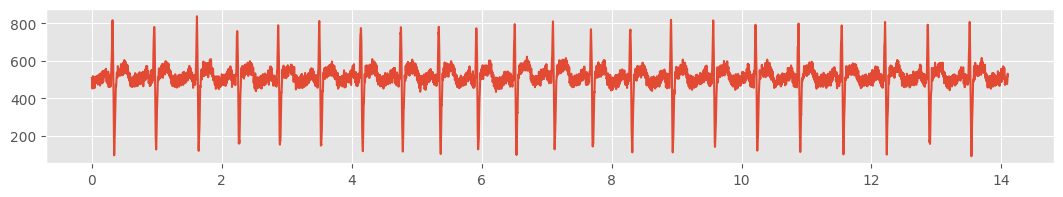

In [133]:
#Ploteamos la señal en el tiempo
plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
plt.plot(t, d_sensor)

## Pasando el array a pandas para trabajarlo como series de tiempo

In [134]:
#Pasamos las observaciones a filas correspondientes a una variable t y d_sensor
st_sensor = np.concatenate((t.reshape(-1,1),  d_sensor.reshape(-1,1)), axis=1)

In [135]:
#Creamos el data frame con las varibles t y d_sensor
df = pd.DataFrame(st_sensor, columns=["t","d_sensor"])
df.head()

,t,d_sensor
0,0.000,510.0
1,0.001,508.0
2,0.002,498.0
3,0.003,484.0
4,0.004,474.0


In [136]:
#Establecemos t como index 
df = df.set_index("t")
df.head()

,d_sensor
t,
0.000,510.0
0.001,508.0
0.002,498.0
0.003,484.0
0.004,474.0


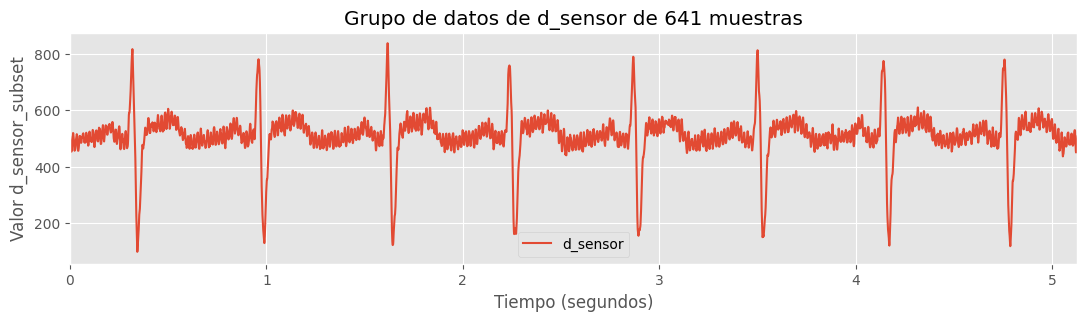

In [137]:
#Ploteamos la señal

df.plot(figsize=(13,3))
plt.xlim(0,5.128)
#####plt.plot(df.index, df.loc[936])#######
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Valor d_sensor_subset")  # Cambiar el nombre del eje y
plt.title("Grupo de datos de d_sensor de 641 muestras")  # Cambiar el título
plt.show()


## Pasando a data tabular estilo Sklearn

In [138]:
df.index.max()/0.64

22.0296875

In [139]:
df.shape[0]/22

640.9090909090909

In [140]:
d_obs = df["d_sensor"].values[:5128].reshape(8, 641)
d_obs

array([[510., 508., 498., ..., 477., 473., 467.],
       [470., 477., 483., ..., 482., 492., 503.],
       [514., 524., 529., ..., 472., 461., 465.],
       ...,
       [457., 465., 472., ..., 476., 483., 501.],
       [515., 519., 519., ..., 515., 513., 500.],
       [470., 453., 455., ..., 465., 476., 488.]])

<Figure size 1300x200 with 0 Axes>

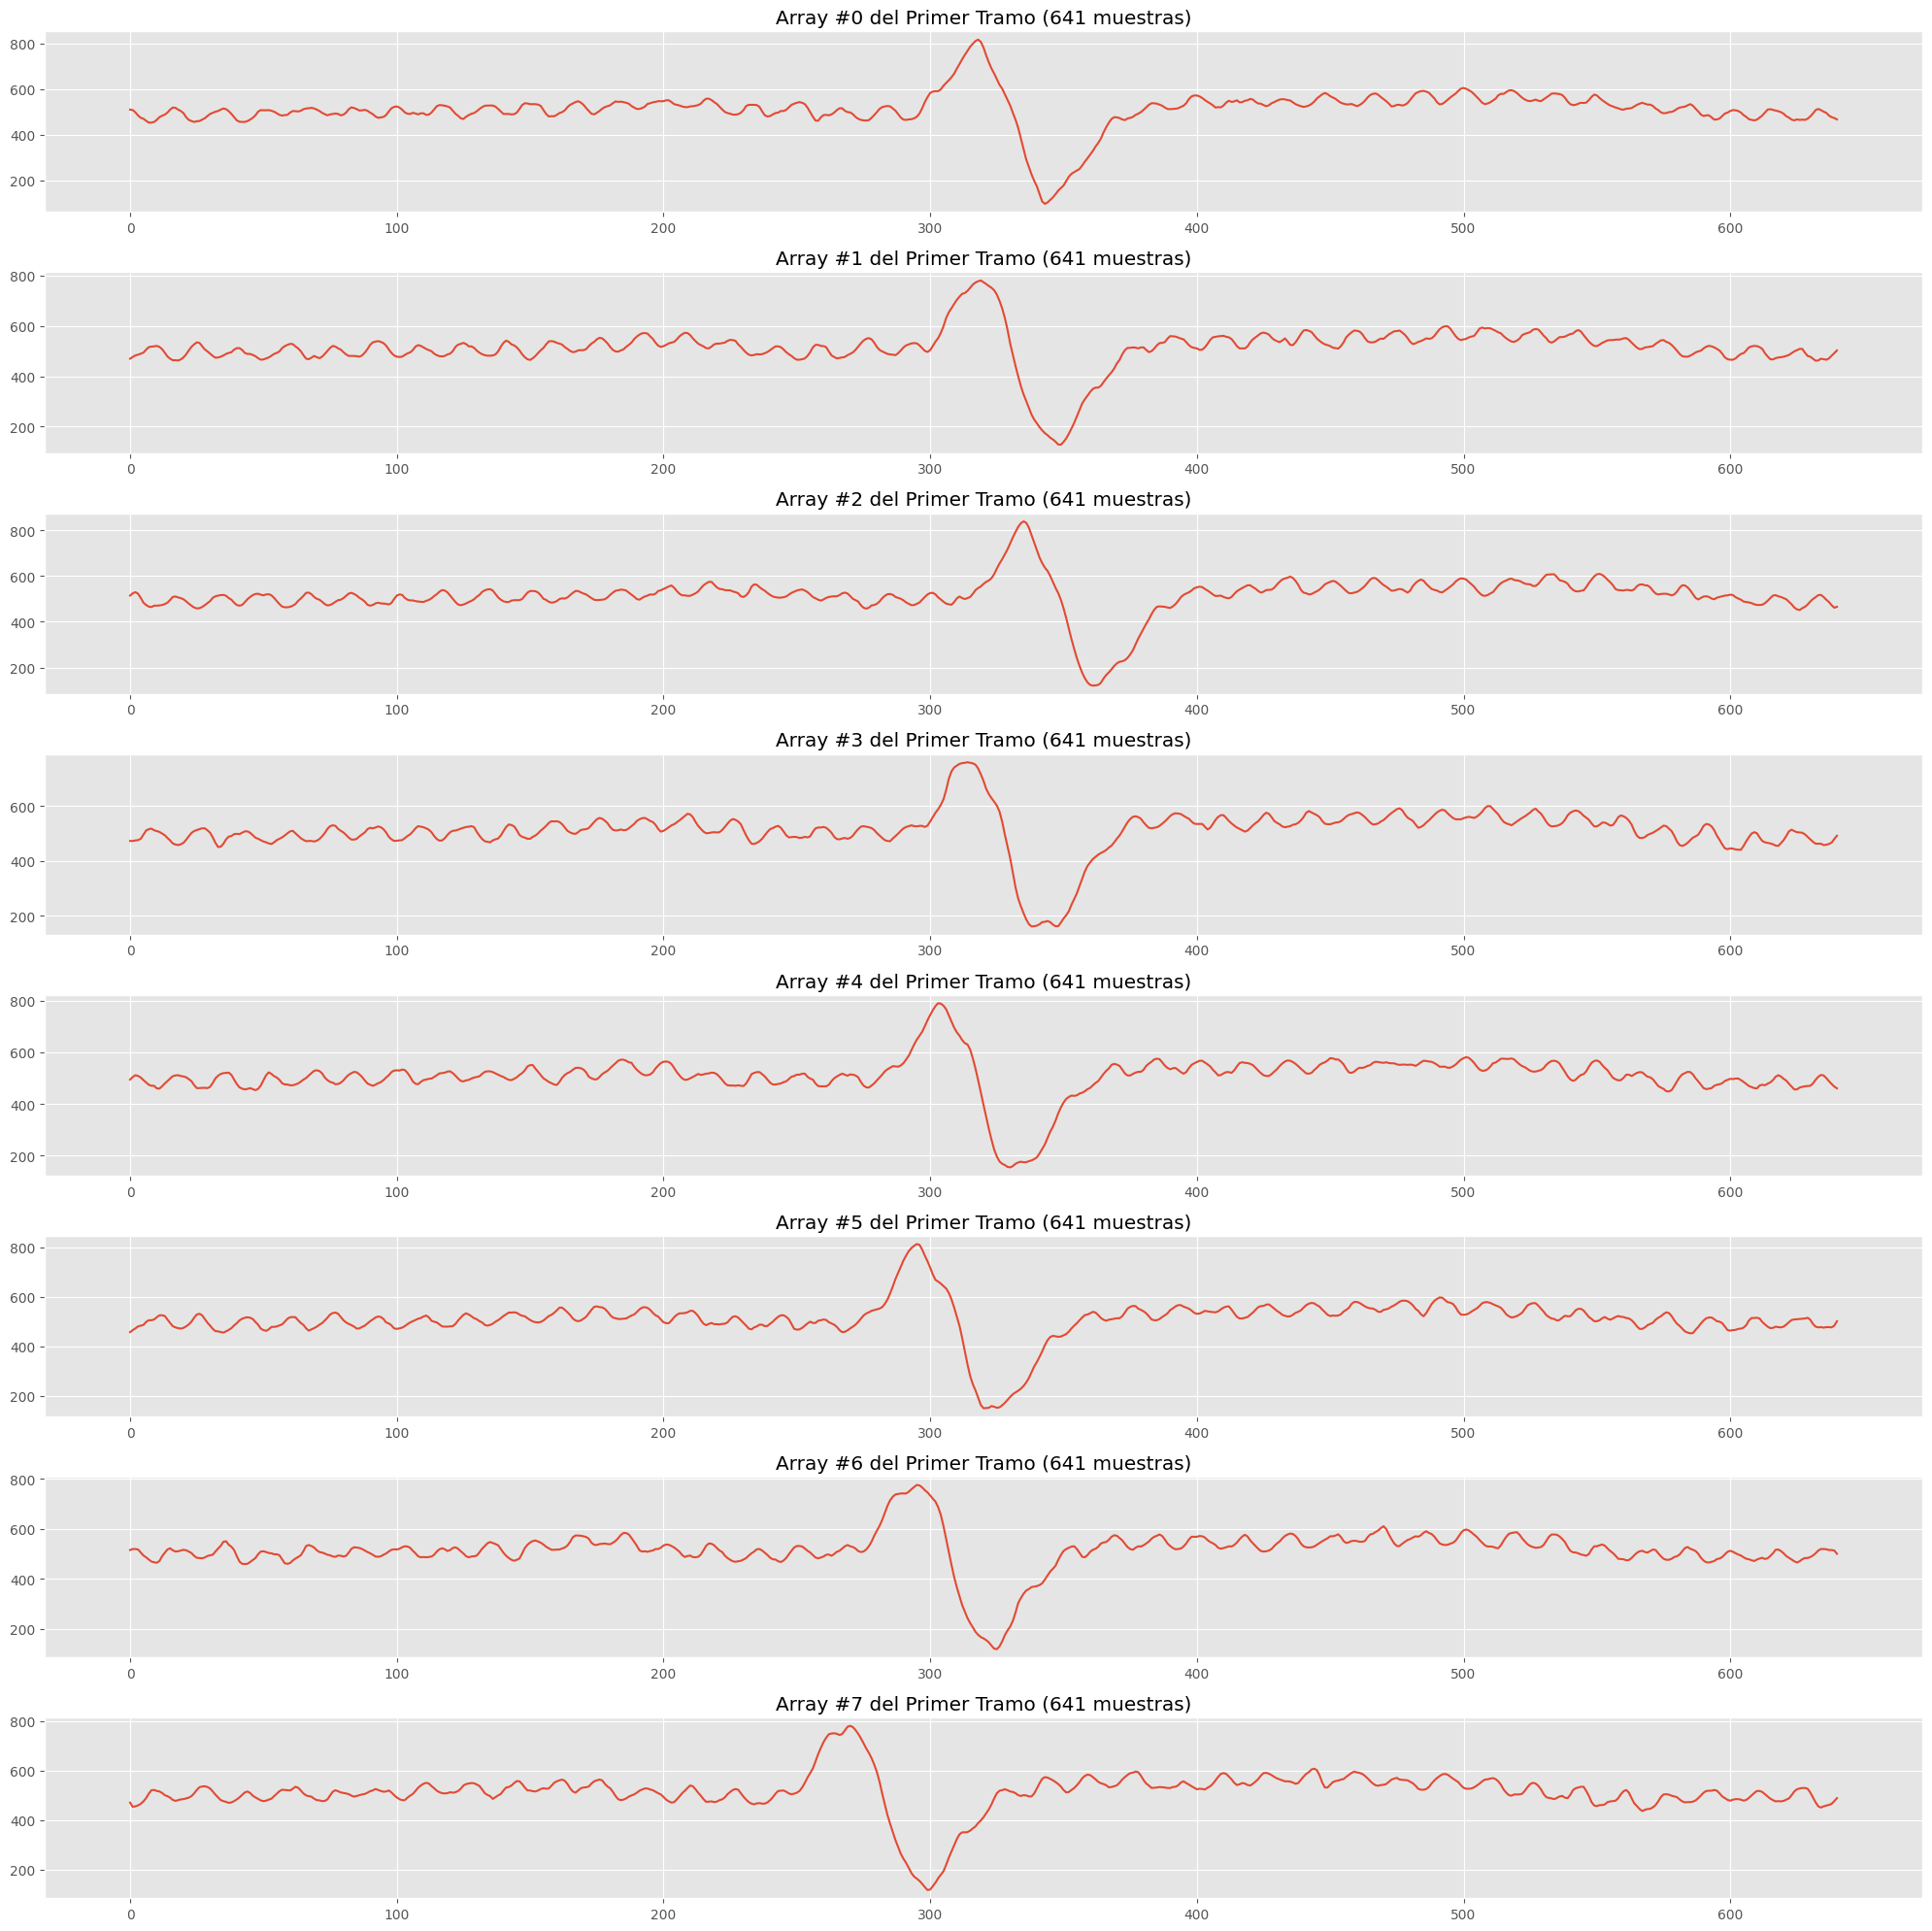

In [141]:
#plt.figure(figsize=(15,2))
#plt.plot(d_obs[7])
plt.figure(figsize=(13,2))
#plt.plot(d_obs[])

fig, axs = plt.subplots(nrows=8, figsize=(20, 20))

for i in range(8):
    axs[i].plot(d_obs[i])
    axs[i].set_title(f"Array #{i} del Primer Tramo (641 muestras)")
    
plt.tight_layout()
plt.show()

In [142]:
################ SEGUNDO GRUPO
Fs = 1000 #Frecuencia de muestreo del dispositivo de adquisición
Ts=1/Fs
n = np.arange(0,5400)  # t = n*Ts
t_2 = n*Ts
len(t_2)
t_2

# Seleccionar valores desde el índice 4487 hasta el final de la columna "d_sensor"
d_sensor_subset = df["d_sensor"].values[5128:10528]
len(d_sensor_subset)
d_sensor_subset


array([498., 507., 520., ..., 465., 471., 482.])

In [143]:
################ TERCER GRUPO
n = np.arange(0,3400)  # t = n*Ts
t_3 = n*Ts
len(t_3)
t_3

# Seleccionar valores desde el índice 4487 hasta el final de la columna "d_sensor"
d_sensor_subset_2 = df["d_sensor"].values[10528:13928] #5 de 650=3250
len(d_sensor_subset_2)
d_sensor_subset_2


array([491., 495., 493., ..., 487., 499., 504.])

In [144]:
################ SEGUNDO GRUPO
#Pasamos las observaciones a filas correspondientes a una variable t y d_sensor
st_sensor_2 = np.concatenate((t_2.reshape(-1,1),  d_sensor_subset.reshape(-1,1)), axis=1)

#Creamos el data frame con las varibles t y d_sensor
df_2 = pd.DataFrame(st_sensor_2, columns=["t_2","d_sensor_subset"])
df_2.head()

# Establecer t_2 como índice
df_2 = df_2.set_index("t_2")
df_2.head()

df_2


,d_sensor_subset
t_2,
0.000,498.0
0.001,507.0
0.002,520.0
0.003,523.0
0.004,511.0
...,...
5.395,464.0
5.396,461.0
5.397,465.0


In [145]:

################ TERCER GRUPO
#Pasamos las observaciones a filas correspondientes a una variable t y d_sensor
st_sensor_3 = np.concatenate((t_3.reshape(-1,1),  d_sensor_subset_2.reshape(-1,1)), axis=1)

#Creamos el data frame con las varibles t y d_sensor
df_3 = pd.DataFrame(st_sensor_3, columns=["t_3","d_sensor_subset_2"])
df_3.head()

# Establecer t_2 como índice
df_3 = df_3.set_index("t_3")
df_3.head()

df_3


,d_sensor_subset_2
t_3,
0.000,491.0
0.001,495.0
0.002,493.0
0.003,489.0
0.004,488.0
...,...
3.395,480.0
3.396,481.0
3.397,487.0


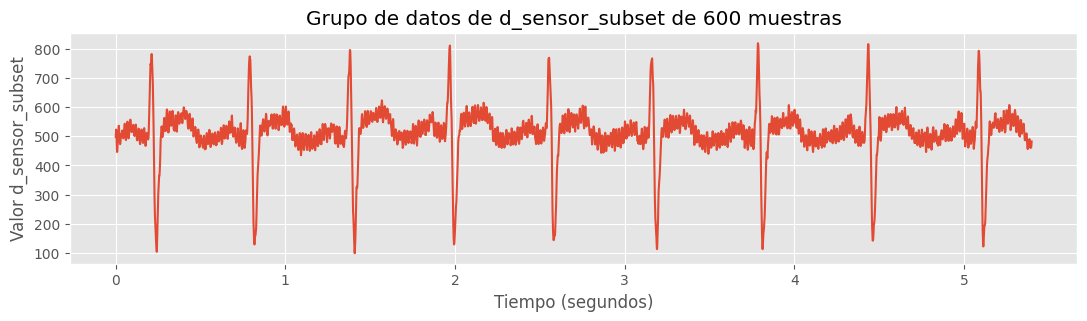

In [146]:

# Graficar los valores de d_sensor_subset correspondientes al primer segundo
plt.figure(figsize=(13, 3))
plt.plot(df_2)
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Valor d_sensor_subset")  # Cambiar el nombre del eje y
plt.title("Grupo de datos de d_sensor_subset de 600 muestras")  # Cambiar el título
plt.show()


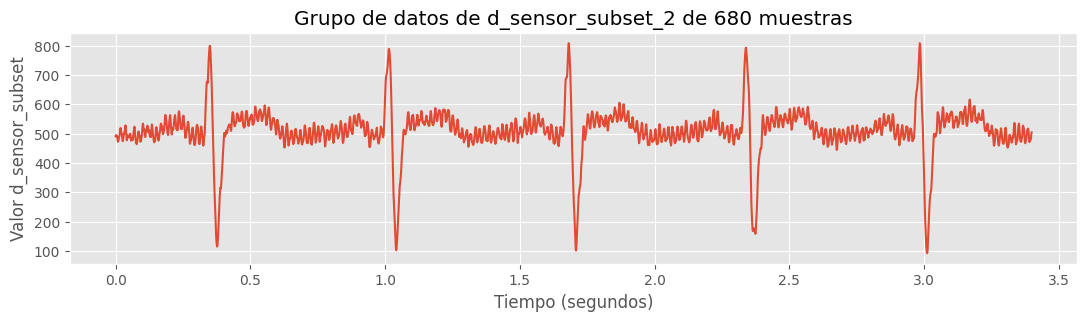

In [147]:

# Graficar los valores de d_sensor_subset correspondientes al primer segundo
plt.figure(figsize=(13, 3))
plt.plot(df_3)
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Valor d_sensor_subset")  # Cambiar el nombre del eje y
plt.title("Grupo de datos de d_sensor_subset_2 de 680 muestras")  # Cambiar el título
plt.show()


In [148]:
len(df_2)/600

9.0

In [149]:
len(df_3)/680

5.0

In [150]:
d_obs_2 = df["d_sensor"].values[5128:10528].reshape(9, 600)
d_obs_2

array([[498., 507., 520., ..., 478., 484., 499.],
       [505., 509., 512., ..., 483., 488., 502.],
       [516., 522., 524., ..., 499., 501., 508.],
       ...,
       [522., 524., 519., ..., 493., 491., 496.],
       [506., 513., 515., ..., 468., 474., 480.],
       [495., 508., 508., ..., 465., 471., 482.]])

In [151]:
d_obs_3 = df["d_sensor"].values[10528:13928].reshape(5, 680)
d_obs_3


array([[491., 495., 493., ..., 466., 466., 472.],
       [476., 478., 487., ..., 469., 468., 468.],
       [470., 471., 478., ..., 510., 498., 484.],
       [475., 474., 478., ..., 521., 521., 522.],
       [515., 505., 502., ..., 487., 499., 504.]])

<Figure size 1300x200 with 0 Axes>

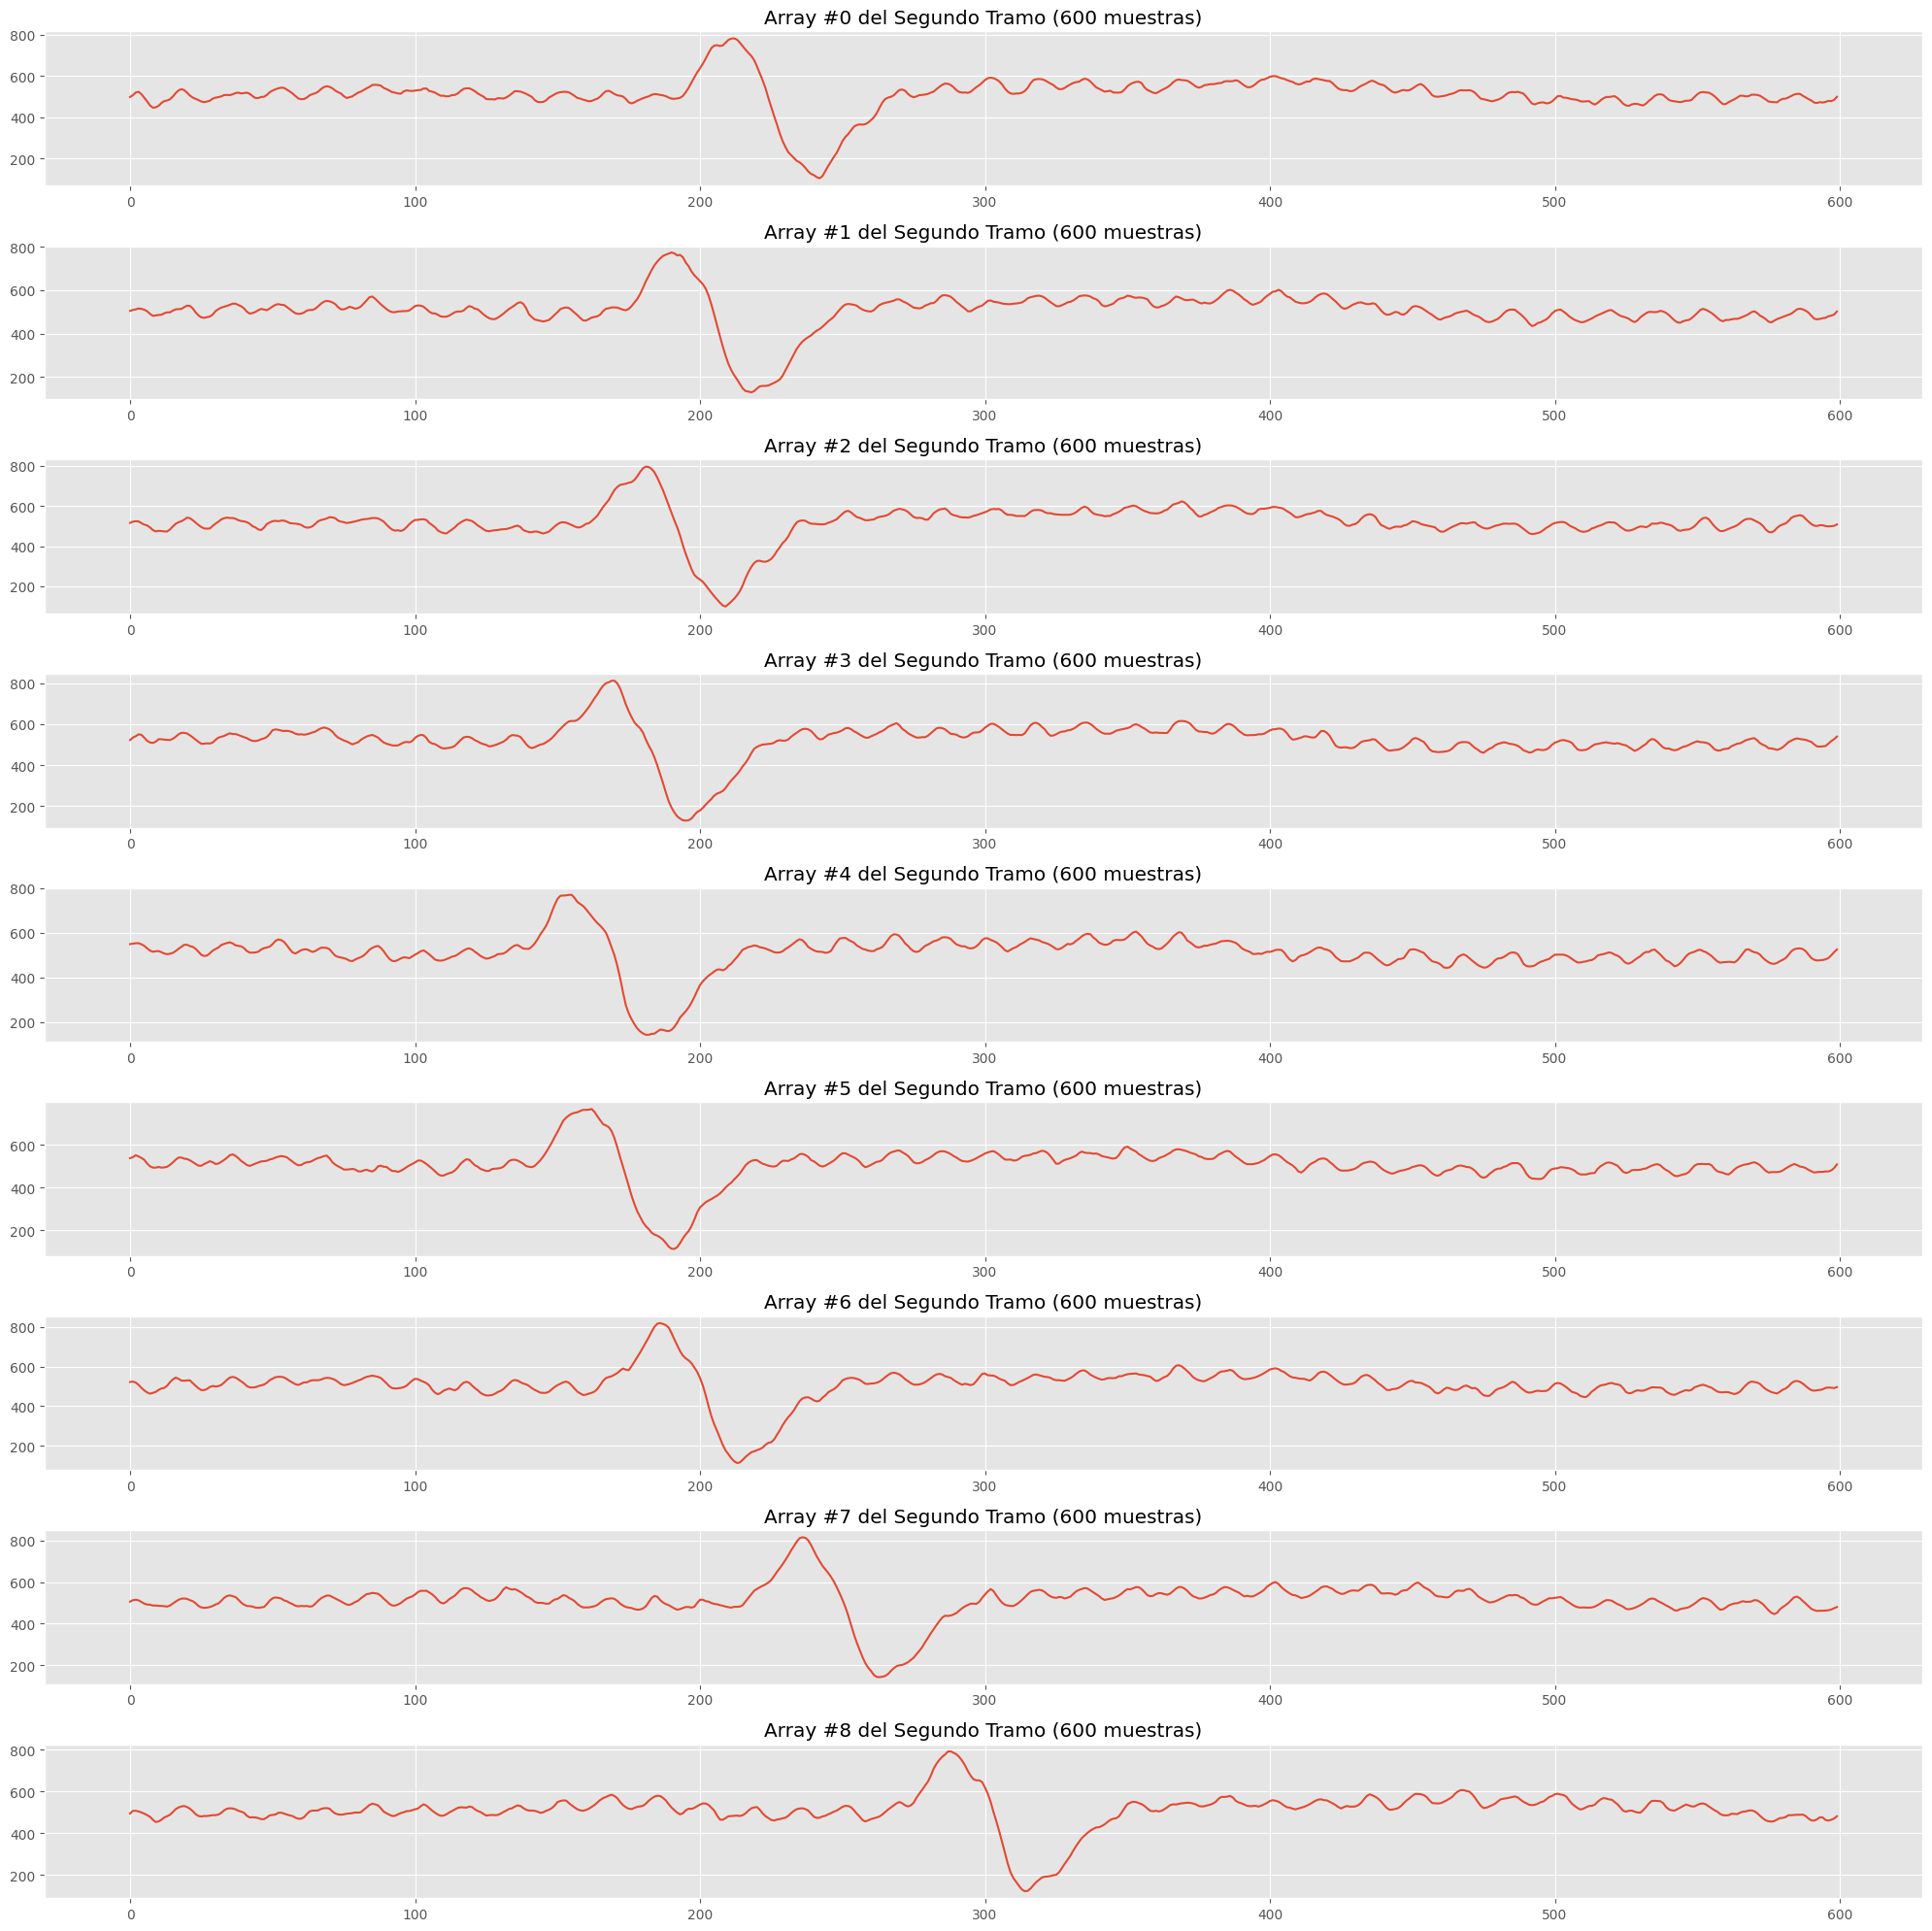

(9, 600)

In [152]:
plt.figure(figsize=(13,2))
#plt.plot(d_obs_2[8])


fig, axs = plt.subplots(nrows=9, figsize=(20, 20))

for i in range(9):
    axs[i].plot(d_obs_2[i])
    axs[i].set_title(f"Array #{i} del Segundo Tramo (600 muestras)")
    
plt.tight_layout()
plt.show()

d_obs_2.shape

<Figure size 1300x200 with 0 Axes>

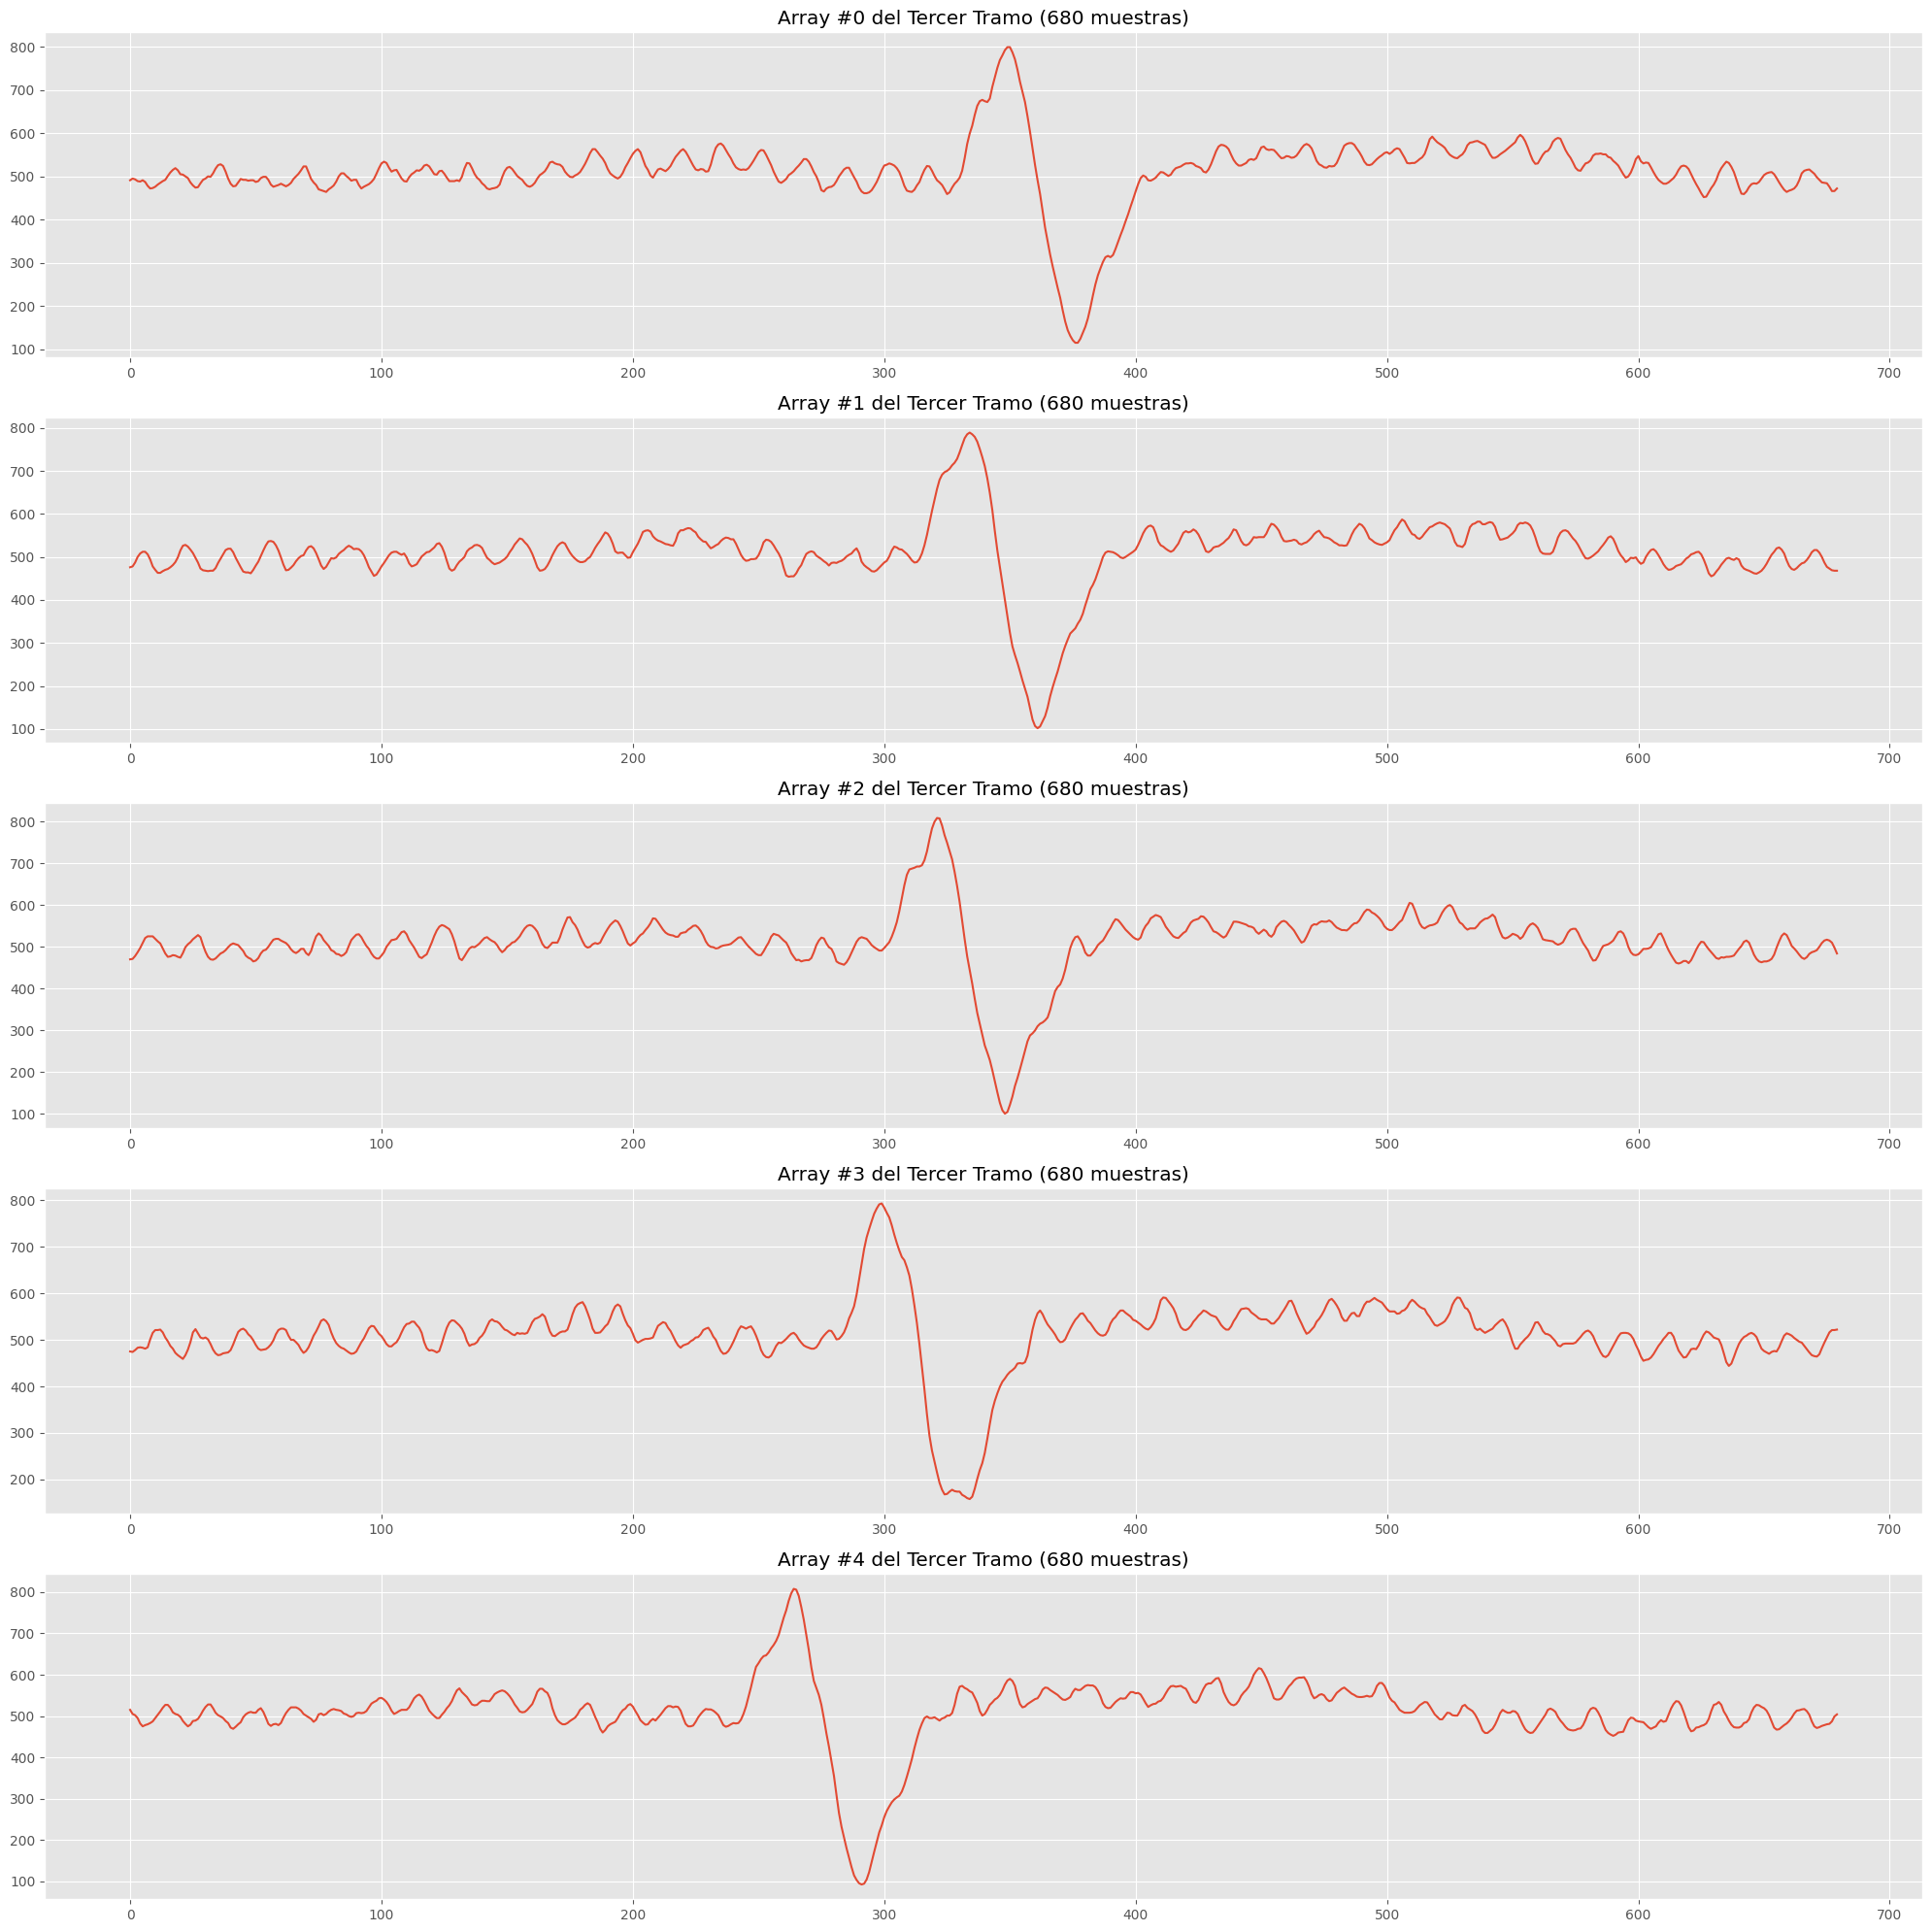

(5, 680)

In [153]:
plt.figure(figsize=(13,2))
#plt.plot(d_obs_3[4])

fig, axs = plt.subplots(nrows=5, figsize=(20, 20))

for i in range(5):
    axs[i].plot(d_obs_3[i])
    axs[i].set_title(f"Array #{i} del Tercer Tramo (680 muestras)")
    
plt.tight_layout()
plt.show()

d_obs_3.shape

In [154]:
# Tamaño requerido para los subarrays
tamano_subarray = 680

# Agregar ceros al final de los subarrays en array1 y array2
d_obs = np.concatenate((d_obs, np.zeros((8, tamano_subarray - d_obs.shape[1]))), axis=1)
d_obs_2 = np.concatenate((d_obs_2, np.zeros((9, tamano_subarray - d_obs_2.shape[1]))), axis=1)

# Concatenar los arrays en uno solo
array_ecgbasal = np.concatenate((d_obs, d_obs_2, d_obs_3), axis=0)
array_ecgbasal

array([[510., 508., 498., ...,   0.,   0.,   0.],
       [470., 477., 483., ...,   0.,   0.,   0.],
       [514., 524., 529., ...,   0.,   0.,   0.],
       ...,
       [470., 471., 478., ..., 510., 498., 484.],
       [475., 474., 478., ..., 521., 521., 522.],
       [515., 505., 502., ..., 487., 499., 504.]])

In [155]:
len(array_ecgbasal)
len(d_obs[1])

680

## Descripción de categoria de los ejercicios realizado en la clase de ECG

| Descripción | Categoria |
|----------|----------|
| Basal    | 0   |
| Respiracion   | 1   | 
| Post-Ejercicio    | 2   |


In [156]:
#array4 = np.concatenate((array3,  np.repeat(0, array3.shape[0]).reshape(-1,1)), axis=1)

# Creamos una categoría
target_0 = np.repeat(0, array_ecgbasal.shape[0])
target_0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [157]:
ecg_basal = {"base": array_ecgbasal, "target": target_0}
ecg_basal

{'base': array([[510., 508., 498., ...,   0.,   0.,   0.],
        [470., 477., 483., ...,   0.,   0.,   0.],
        [514., 524., 529., ...,   0.,   0.,   0.],
        ...,
        [470., 471., 478., ..., 510., 498., 484.],
        [475., 474., 478., ..., 521., 521., 522.],
        [515., 505., 502., ..., 487., 499., 504.]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}